In [1]:
import arviz as az
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
base_path = '/home/jez/Bias_Correction/'
idata_path = f'{base_path}data/Lima2021/Daily_Temperature_NFit.nc'
antarctica_shapefile_path = f'{base_path}data/Antarctica_Shapefile/antarctica_shapefile.shp'

idata = az.from_netcdf(idata_path)
antarctica_gdf = gpd.read_file(antarctica_shapefile_path)

expectations = idata.posterior.mean(['chain','draw'])

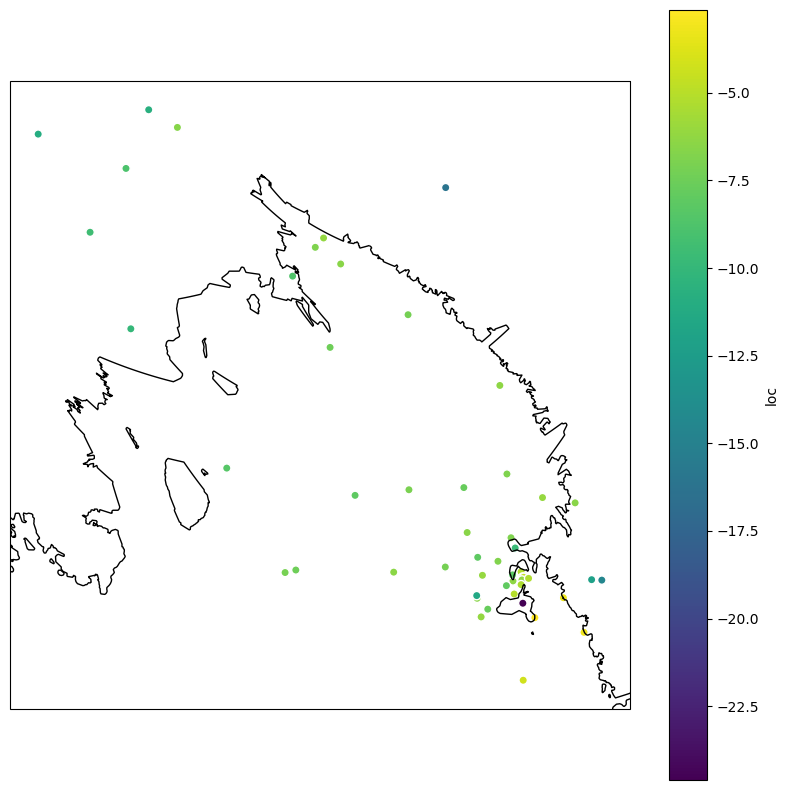

In [3]:
map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0, globe=None)
antarctica_gdf_map_proj = antarctica_gdf.to_crs(map_proj)

fig, axs = plt.subplots(1, 1, subplot_kw={"projection": map_proj}, figsize=(10, 10))

expectations.plot.scatter(x="Lon",y="Lat",transform=ccrs.PlateCarree(),ax=axs,hue='loc')

axs.coastlines()

# antarctica_gdf_map_proj.boundary.plot(ax=axs, color="k", linewidth=0.3)